In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\perez bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_perez.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-19.5,-16.7,-17.5,-17.5,-14.7,-19.2,-14.7,-14.9,-19.5,-17.5,...,-14.7,-19.2,-14.7,-15.8,-14.7,-19.5,-17.5,-15.8,-14.7,1
1,-17.0,-17.5,-16.7,-17.5,-19.5,-14.7,-19.5,-16.7,-19.5,-14.7,...,-19.5,-17.5,-17.5,-18.1,-19.2,-14.7,-17.5,-16.7,-17.5,1
2,-15.8,-17.5,-17.5,-14.7,-19.5,-18.1,-15.8,-14.7,-15.8,-17.5,...,-19.5,-18.1,-17.5,-17.0,-16.7,-17.0,-17.5,-16.7,-19.5,1
3,-17.5,-17.5,-18.1,-19.2,-14.7,-19.2,-14.7,-19.5,-17.5,-17.5,...,-17.5,-17.0,-18.1,-15.8,-17.5,-17.0,-17.5,-16.7,-19.5,1
4,-14.7,-18.1,-15.8,-17.5,-17.0,-17.5,-16.7,-17.0,-17.5,-16.7,...,-19.5,-17.5,-16.7,-17.0,-17.5,-15.8,-14.7,-19.2,-14.7,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-15.8,-18.1,-17.0,-16.7,-14.7,-19.5,-16.7,-17.5,-17.5,-17.0,...,-15.8,-14.7,-14.9,-19.2,-14.9,-14.9,-14.7,-17.5,-15.8,-18.1
1,-14.9,-14.7,-15.8,-14.7,-17.5,-15.8,-14.9,-14.7,-17.5,-18.1,...,-19.5,-14.7,-14.9,-19.2,-14.7,-19.5,-16.7,-17.0,-18.1,-19.2
2,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,-18.1,-19.5,-17.5,-18.1,...,-17.5,-17.5,-18.1,-19.5,-15.8,-14.7,-15.8,-17.5,-19.5,-14.7
3,-18.1,-19.5,-14.7,-17.5,-16.7,-17.5,-17.5,-19.5,-18.1,-17.5,...,-19.2,-14.7,-15.8,-19.5,-14.7,-15.8,-17.5,-17.5,-17.0,-17.5
4,-17.5,-17.5,-15.8,-14.7,-18.1,-19.2,-14.7,-15.8,-14.7,-15.8,...,-15.8,-14.7,-15.8,-19.5,-14.7,-16.7,-19.5,-14.7,-16.7,-17.0


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-15.8,-18.1,-17.0,-16.7,-14.7,-19.5,-16.7,-17.5,-17.5,-17.0,...,-15.8,-14.7,-14.9,-19.2,-14.9,-14.9,-14.7,-17.5,-15.8,-18.1
1,-14.9,-14.7,-15.8,-14.7,-17.5,-15.8,-14.9,-14.7,-17.5,-18.1,...,-19.5,-14.7,-14.9,-19.2,-14.7,-19.5,-16.7,-17.0,-18.1,-19.2
2,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,-18.1,-19.5,-17.5,-18.1,...,-17.5,-17.5,-18.1,-19.5,-15.8,-14.7,-15.8,-17.5,-19.5,-14.7
3,-18.1,-19.5,-14.7,-17.5,-16.7,-17.5,-17.5,-19.5,-18.1,-17.5,...,-19.2,-14.7,-15.8,-19.5,-14.7,-15.8,-17.5,-17.5,-17.0,-17.5
4,-17.5,-17.5,-15.8,-14.7,-18.1,-19.2,-14.7,-15.8,-14.7,-15.8,...,-15.8,-14.7,-15.8,-19.5,-14.7,-16.7,-19.5,-14.7,-16.7,-17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-16.7,-17.5,-19.5,-14.7,-15.8,-19.5,-14.9,-18.1,-17.5,-19.5,...,-15.8,-14.7,-15.8,-18.1,-17.5,-19.5,-14.7,-14.9,-14.9,-19.5
14665,-14.7,-17.5,-15.8,-18.1,-14.7,-19.5,-18.1,-14.9,-19.5,-15.8,...,-16.7,-17.5,-17.0,-18.1,-15.8,-14.7,-14.9,-15.8,-17.0,-18.1
14666,-17.5,-17.5,-17.5,-17.5,-19.5,-14.9,-14.7,-19.2,-18.1,-17.0,...,-17.5,-17.0,-15.8,-14.7,-18.1,-19.5,-15.8,-18.1,-17.5,-19.5
14667,-19.2,-14.7,-17.5,-16.7,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,...,-17.0,-16.7,-17.5,-17.5,-17.5,-17.5,-17.0,-18.1,-19.5,-18.1


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-15.8,-18.1,-17.0,-16.7,-14.7,-19.5,-16.7,-17.5,-17.5,-17.0,...,-14.7,-14.9,-19.2,-14.9,-14.9,-14.7,-17.5,-15.8,-18.1,0
1,-14.9,-14.7,-15.8,-14.7,-17.5,-15.8,-14.9,-14.7,-17.5,-18.1,...,-14.7,-14.9,-19.2,-14.7,-19.5,-16.7,-17.0,-18.1,-19.2,0
2,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,-18.1,-19.5,-17.5,-18.1,...,-17.5,-18.1,-19.5,-15.8,-14.7,-15.8,-17.5,-19.5,-14.7,0
3,-18.1,-19.5,-14.7,-17.5,-16.7,-17.5,-17.5,-19.5,-18.1,-17.5,...,-14.7,-15.8,-19.5,-14.7,-15.8,-17.5,-17.5,-17.0,-17.5,0
4,-17.5,-17.5,-15.8,-14.7,-18.1,-19.2,-14.7,-15.8,-14.7,-15.8,...,-14.7,-15.8,-19.5,-14.7,-16.7,-19.5,-14.7,-16.7,-17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-16.7,-17.5,-19.5,-14.7,-15.8,-19.5,-14.9,-18.1,-17.5,-19.5,...,-14.7,-15.8,-18.1,-17.5,-19.5,-14.7,-14.9,-14.9,-19.5,0
14665,-14.7,-17.5,-15.8,-18.1,-14.7,-19.5,-18.1,-14.9,-19.5,-15.8,...,-17.5,-17.0,-18.1,-15.8,-14.7,-14.9,-15.8,-17.0,-18.1,0
14666,-17.5,-17.5,-17.5,-17.5,-19.5,-14.9,-14.7,-19.2,-18.1,-17.0,...,-17.0,-15.8,-14.7,-18.1,-19.5,-15.8,-18.1,-17.5,-19.5,0
14667,-19.2,-14.7,-17.5,-16.7,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,...,-16.7,-17.5,-17.5,-17.5,-17.5,-17.0,-18.1,-19.5,-18.1,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-16.745136
1,-79,-16.755505
2,-78,-16.784532
3,-77,-16.759091
4,-76,-16.752614
...,...,...
94,14,-16.782698
95,15,-16.762151
96,16,-16.753623
97,17,-16.738455


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-16.733008,150
1,-79,-16.735115,151
2,-78,-16.724037,152
3,-77,-16.702706,153
4,-76,-16.754482,154
...,...,...,...
94,14,-16.713252,244
95,15,-16.734897,245
96,16,-16.715713,246
97,17,-16.702815,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


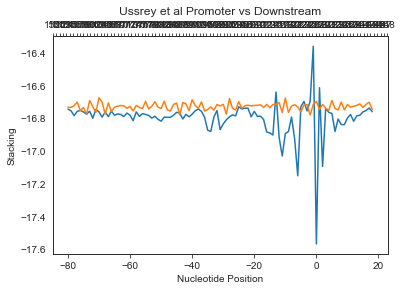

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'])

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Ussrey et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-19.5,-16.7,-17.5,-17.5,-14.7,-19.2,-14.7,-14.9,-19.5,-17.5,...,-14.7,-19.2,-14.7,-15.8,-14.7,-19.5,-17.5,-15.8,-14.7,1
1,-17.0,-17.5,-16.7,-17.5,-19.5,-14.7,-19.5,-16.7,-19.5,-14.7,...,-19.5,-17.5,-17.5,-18.1,-19.2,-14.7,-17.5,-16.7,-17.5,1
2,-15.8,-17.5,-17.5,-14.7,-19.5,-18.1,-15.8,-14.7,-15.8,-17.5,...,-19.5,-18.1,-17.5,-17.0,-16.7,-17.0,-17.5,-16.7,-19.5,1
3,-17.5,-17.5,-18.1,-19.2,-14.7,-19.2,-14.7,-19.5,-17.5,-17.5,...,-17.5,-17.0,-18.1,-15.8,-17.5,-17.0,-17.5,-16.7,-19.5,1
4,-14.7,-18.1,-15.8,-17.5,-17.0,-17.5,-16.7,-17.0,-17.5,-16.7,...,-19.5,-17.5,-16.7,-17.0,-17.5,-15.8,-14.7,-19.2,-14.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-16.7,-17.5,-19.5,-14.7,-15.8,-19.5,-14.9,-18.1,-17.5,-19.5,...,-14.7,-15.8,-18.1,-17.5,-19.5,-14.7,-14.9,-14.9,-19.5,0
29334,-14.7,-17.5,-15.8,-18.1,-14.7,-19.5,-18.1,-14.9,-19.5,-15.8,...,-17.5,-17.0,-18.1,-15.8,-14.7,-14.9,-15.8,-17.0,-18.1,0
29335,-17.5,-17.5,-17.5,-17.5,-19.5,-14.9,-14.7,-19.2,-18.1,-17.0,...,-17.0,-15.8,-14.7,-18.1,-19.5,-15.8,-18.1,-17.5,-19.5,0
29336,-19.2,-14.7,-17.5,-16.7,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,...,-16.7,-17.5,-17.5,-17.5,-17.5,-17.0,-18.1,-19.5,-18.1,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve,auc, RocCurveDisplay
from statistics import mean
import sklearn.metrics as metrics
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef, confusion_matrix

In [27]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [28]:
feature_list=list(X_train.columns)

In [29]:
#'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

In [30]:
X.shape

(29338, 99)

## Model Training

In [32]:
kfold = KFold(n_splits=10, shuffle=True)
clf = svm.SVC(kernel='rbf')
fold_no = 1

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((y_train, y_test), axis=0)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)
    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))
    
    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)
    
    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))
    
    fold_no += 1

Fold 1: Accuracy: 0.7440354464894342, Precision: 0.7402159244264508, Recall: 0.7498291182501708, F1 Score: 0.7449915110356536, MCC: 0.48812610465186074, Specificity: 0.7382732834806254
Fold 2: Accuracy: 0.7300613496932515, Precision: 0.7160904255319149, Recall: 0.746879334257975, F1 Score: 0.7311608961303463, MCC: 0.46076598063727314, Specificity: 0.7138069705093834
Fold 3: Accuracy: 0.7382413087934561, Precision: 0.7417808219178083, Recall: 0.7347354138398915, F1 Score: 0.738241308793456, MCC: 0.4765162357576997, Specificity: 0.7417808219178083
Fold 4: Accuracy: 0.7399454669393319, Precision: 0.747229916897507, Recall: 0.7305348679756263, F1 Score: 0.7387880862718247, MCC: 0.48006796489712056, Specificity: 0.7494852436513384
Fold 5: Accuracy: 0.7334696659850034, Precision: 0.7180500658761528, Recall: 0.7548476454293629, F1 Score: 0.7359891964888589, MCC: 0.4678246402934007, Specificity: 0.7127516778523489
Fold 6: Accuracy: 0.7351738241308794, Precision: 0.7416496250852079, Recall: 0.7

In [33]:
accuracy_list

[0.7440354464894342,
 0.7300613496932515,
 0.7382413087934561,
 0.7399454669393319,
 0.7334696659850034,
 0.7351738241308794,
 0.7409679618268575,
 0.7409679618268575,
 0.7367882713944767,
 0.7217865666553017]

In [34]:
precision_list

[0.7402159244264508,
 0.7160904255319149,
 0.7417808219178083,
 0.747229916897507,
 0.7180500658761528,
 0.7416496250852079,
 0.7362177250523377,
 0.7435723951285521,
 0.7370860927152317,
 0.7163398692810458]

In [35]:
recall_list

[0.7498291182501708,
 0.746879334257975,
 0.7347354138398915,
 0.7305348679756263,
 0.7548476454293629,
 0.7321668909825033,
 0.7341684064022269,
 0.7425675675675676,
 0.7479838709677419,
 0.7415426251691475]

In [36]:
specificity_list

[0.7382732834806254,
 0.7138069705093834,
 0.7417808219178083,
 0.7494852436513384,
 0.7127516778523489,
 0.7382596685082873,
 0.7474949899799599,
 0.7393397524071527,
 0.7252595155709343,
 0.7017182130584192]

In [37]:
f1_score_list 

[0.7449915110356536,
 0.7311608961303463,
 0.738241308793456,
 0.7387880862718247,
 0.7359891964888589,
 0.7368777514392143,
 0.7351916376306621,
 0.7430696416497633,
 0.7424949966644429,
 0.7287234042553191]

In [38]:
mcc_list

[0.48812610465186074,
 0.46076598063727314,
 0.4765162357576997,
 0.48006796489712056,
 0.4678246402934007,
 0.47038710222152536,
 0.4816920588651151,
 0.4819019454337539,
 0.4734008343069672,
 0.4436633214178884]

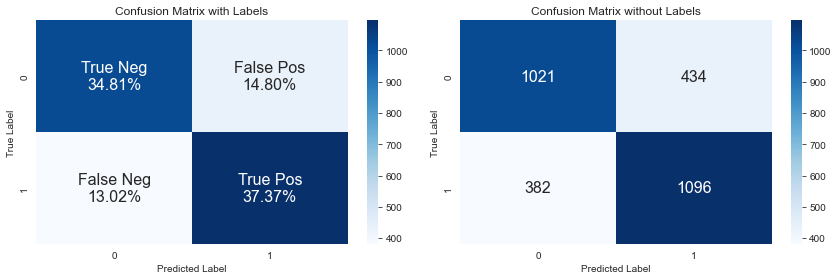

In [39]:
train_cm= confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [40]:
print(mean(accuracy_list))

0.736143782373485


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


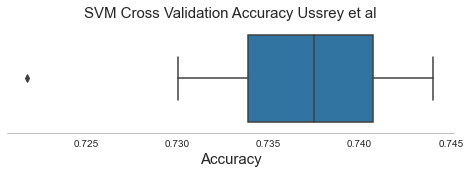

In [41]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('SVM Cross Validation Accuracy Ussrey et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


In [42]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.7217865666553017
Precision: 0.7163398692810458
Recall: 0.7415426251691475
f1_score: 0.7287234042553191


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


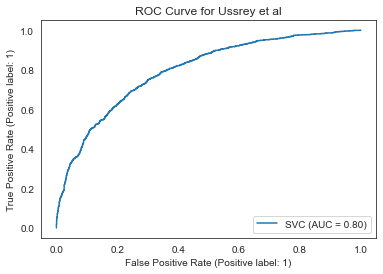

In [43]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ussrey et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


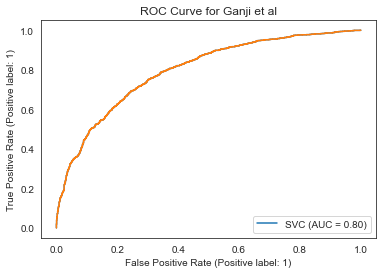

In [44]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_perez_svm_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [65]:
!pip install shap

In [66]:
import shap


In [67]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [68]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[8081, 2132, 8982, 4223, 9217, 7124, 339, 9222, 9621, 4958, 2580, 3559, 6928, 7030, 6772, 9517, 156, 3509, 5088, 5143, 7997, 6396, 2568, 1593, 9692, 5680, 3230, 4048, 2484, 9609, 1561, 8603, 9344, 2240, 4419, 2961, 8854, 1297, 6368, 1698]


In [69]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [70]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-2.17,-2.18,-1.76,-1.44,-2.81,-1.44,-1.46,-2.99,-1.46,-2.18,...,-2.99,-1.42,-2.99,-1.76,-1.42,-1.76,-2.18,-2.81,-1.42,-2.99
6345,-2.81,-1.44,-2.81,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-2.18,...,-1.44,-1.95,-1.46,-2.18,-1.46,-2.81,-1.44,-1.76,-2.18,-1.46
8807,-1.44,-1.76,-2.99,-1.42,-2.99,-1.46,-1.44,-1.76,-2.18,-1.46,...,-1.95,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-1.95,-1.95,-2.18
5017,-2.81,-1.44,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,-2.81,-1.52,...,-2.81,-1.76,-1.42,-2.18,-2.81,-1.76,-1.42,-2.81,-1.95,-2.18
2395,-1.44,-1.46,-2.18,-1.46,-2.81,-2.18,-1.44,-1.46,-1.76,-1.76,...,-2.17,-1.95,-1.52,-2.17,-1.95,-2.18,-1.46,-1.95,-1.95,-1.95
4771,-1.46,-2.81,-1.44,-2.18,-2.81,-1.46,-1.95,-1.44,-1.76,-2.99,...,-2.18,-1.76,-1.76,-1.44,-2.81,-1.42,-2.18,-2.17,-1.44,-2.99
6378,-2.18,-1.46,-1.76,-2.99,-1.44,-2.81,-1.44,-1.95,-2.17,-1.52,...,-1.76,-2.99,-1.44,-1.95,-2.81,-1.46,-1.52,-1.95,-2.17,-1.44
6038,-1.46,-1.52,-2.17,-2.18,-1.46,-1.52,-2.81,-1.46,-1.52,-2.17,...,-1.52,-2.17,-1.95,-2.18,-1.46,-2.18,-1.42,-2.18,-2.17,-1.52
2073,-1.42,-2.81,-1.52,-1.46,-2.99,-1.44,-1.46,-2.99,-1.44,-2.81,...,-2.17,-2.18,-1.44,-1.95,-2.17,-1.95,-1.95,-1.52,-2.17,-2.18
8765,-1.44,-1.95,-2.17,-1.52,-2.81,-1.76,-1.44,-2.17,-2.18,-1.76,...,-2.17,-1.44,-2.99,-1.76,-1.46,-1.95,-2.18,-1.46,-1.52,-2.17


In [71]:
explainer = shap.KernelExplainer(clf.predict, X_PCA_promoters)
shap_values = explainer.shap_values(X_PCA_promoters)

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [72]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

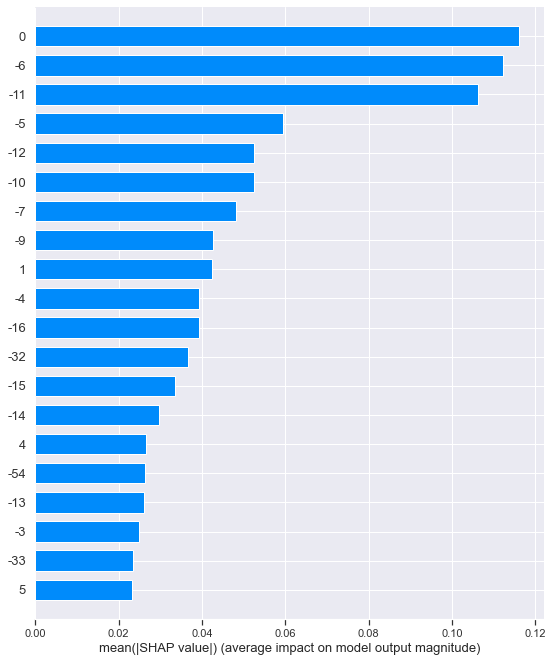

In [73]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

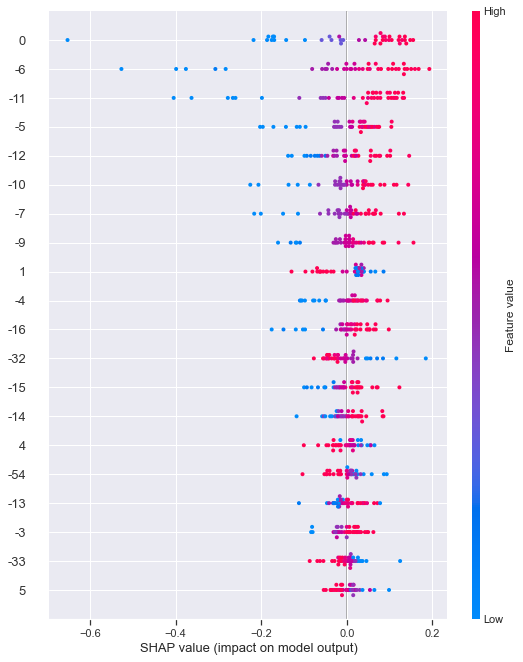

In [74]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

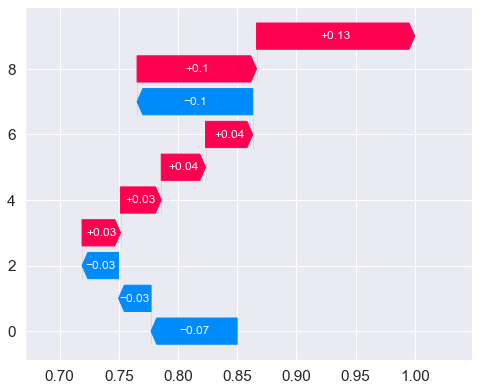

In [75]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [76]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [77]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [45]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\perez\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\perez\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\perez\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\perez\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [46]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



[Text(0.5, 0, 'Nucleotide Position'),
 Text(0, 0.5, 'Stacking'),
 Text(0.5, 1.0, 'Perez Test Organism')]

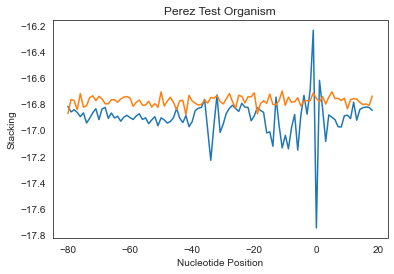

In [47]:
test_plot=sns.lineplot(x='index',y=0,data=test_line)
test_plot=sns.lineplot(x='index',y=0, data= downstream_test_line)

test_plot.set(xlabel ="Nucleotide Position", ylabel = "Stacking", title ='Perez Test Organism')

## Test Labels

In [48]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [49]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [50]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7932900432900433


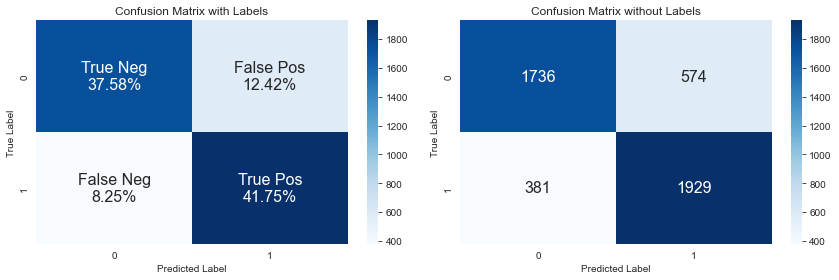

In [51]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [53]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.8225108225108225, Precision: 0.7876447876447876, Recall: 0.8831168831168831, F1 Score: 0.8326530612244898, MCC: 0.6498129580001919, Specificity: 0.7619047619047619
Fold 2/10
 Accuracy: 0.7987012987012987, Precision: 0.7593984962406015, Recall: 0.8744588744588745, F1 Score: 0.8128772635814889, MCC: 0.604380206063752, Specificity: 0.7229437229437229
Fold 3/10
 Accuracy: 0.7575757575757576, Precision: 0.7408906882591093, Recall: 0.7922077922077922, F1 Score: 0.7656903765690376, MCC: 0.5163917019025429, Specificity: 0.7229437229437229
Fold 4/10
 Accuracy: 0.803030303030303, Precision: 0.7755905511811023, Recall: 0.8528138528138528, F1 Score: 0.8123711340206187, MCC: 0.6090872519073924, Specificity: 0.7532467532467533
Fold 5/10
 Accuracy: 0.8051948051948052, Precision: 0.7808764940239044, Recall: 0.8484848484848485, F1 Score: 0.8132780082987552, MCC: 0.6126903275804352, Specificity: 0.7619047619047619
Fold 6/10
 Accuracy: 0.7748917748917749, Precision: 0.7634854771784

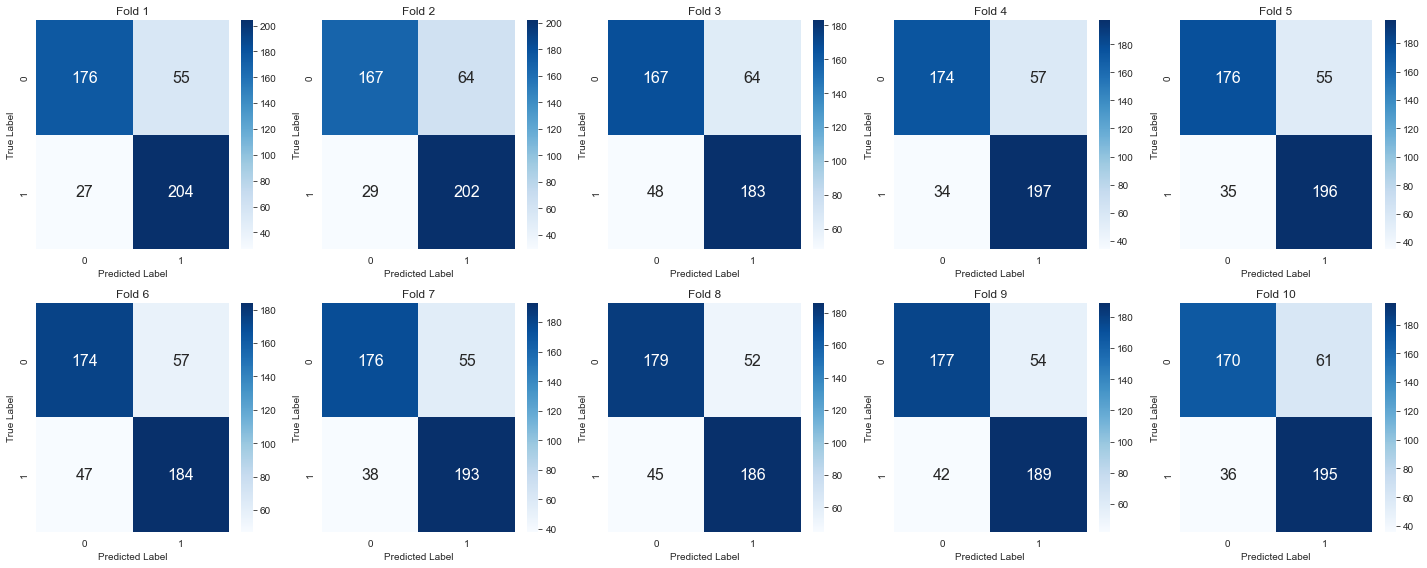

In [54]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [55]:
test_accuracy

[0.8225108225108225,
 0.7987012987012987,
 0.7575757575757576,
 0.803030303030303,
 0.8051948051948052,
 0.7748917748917749,
 0.7987012987012987,
 0.79004329004329,
 0.7922077922077922,
 0.79004329004329]

In [56]:
test_precision

[0.7876447876447876,
 0.7593984962406015,
 0.7408906882591093,
 0.7755905511811023,
 0.7808764940239044,
 0.7634854771784232,
 0.7782258064516129,
 0.7815126050420168,
 0.7777777777777778,
 0.76171875]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [57]:
test_recall

[0.8831168831168831,
 0.8744588744588745,
 0.7922077922077922,
 0.8528138528138528,
 0.8484848484848485,
 0.7965367965367965,
 0.8354978354978355,
 0.8051948051948052,
 0.8181818181818182,
 0.8441558441558441]

In [58]:
test_f1_score

[0.8326530612244898,
 0.8128772635814889,
 0.7656903765690376,
 0.8123711340206187,
 0.8132780082987552,
 0.7796610169491526,
 0.8058455114822546,
 0.79317697228145,
 0.7974683544303799,
 0.8008213552361396]

In [80]:
test_specificity

[0.7619047619047619,
 0.7229437229437229,
 0.7229437229437229,
 0.7532467532467533,
 0.7619047619047619,
 0.7532467532467533,
 0.7619047619047619,
 0.7748917748917749,
 0.7662337662337663,
 0.7359307359307359]

In [59]:
test_mcc

[0.6498129580001919,
 0.604380206063752,
 0.5163917019025429,
 0.6090872519073924,
 0.6126903275804352,
 0.5502994298184029,
 0.5990269468789589,
 0.5803531027655111,
 0.5852057359806528,
 0.5835138994692298]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [60]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense perez promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-17.0,-15.8,-14.9,-14.7,-16.7,-17.5,-14.7,-15.8,-17.5,-17.5,...,-14.9,-19.5,-17.5,-17.5,-17.5,-15.8,-14.7,-17.5,-15.8,1
1,-14.7,-17.5,-15.8,-14.7,-19.2,-14.7,-16.7,-17.0,-17.5,-15.8,...,-17.5,-15.8,-14.7,-19.5,-16.7,-14.7,-14.9,-19.5,-17.5,1
2,-17.5,-14.7,-19.5,-16.7,-19.5,-14.7,-16.7,-17.0,-16.7,-17.0,...,-15.8,-14.7,-15.8,-14.7,-19.2,-18.1,-17.0,-17.5,-17.5,1
3,-14.7,-15.8,-17.0,-15.8,-14.7,-17.5,-15.8,-14.7,-15.8,-19.5,...,-19.5,-14.9,-14.7,-15.8,-14.7,-17.5,-17.5,-16.7,-19.5,1
4,-15.8,-14.9,-18.1,-17.0,-17.5,-17.5,-16.7,-17.0,-18.1,-14.9,...,-19.5,-15.8,-14.9,-14.7,-14.9,-14.9,-15.8,-14.7,-15.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-19.2,-18.1,-17.5,-17.5,-14.7,-14.9,-14.9,-14.9,-15.8,-17.5,...,-17.5,-14.7,-19.5,-16.7,-14.7,-19.2,-18.1,-14.7,-14.9,0
12164,-17.5,-14.7,-15.8,-17.5,-14.7,-19.2,-14.9,-18.1,-19.5,-14.7,...,-18.1,-14.9,-19.2,-14.9,-14.7,-15.8,-14.7,-19.2,-14.7,0
12165,-15.8,-19.5,-14.7,-16.7,-19.5,-14.9,-14.9,-14.9,-14.7,-15.8,...,-18.1,-15.8,-17.0,-17.5,-18.1,-19.5,-15.8,-14.7,-14.9,0
12166,-17.5,-15.8,-14.7,-16.7,-17.5,-19.5,-14.7,-19.2,-14.9,-14.9,...,-14.9,-14.9,-14.7,-18.1,-15.8,-17.5,-17.5,-17.0,-15.8,0


In [61]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [62]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.6491372226787182, Precision: 0.6322674418604651, Recall: 0.7142857142857143, F1 Score: 0.6707787201233616, MCC: 0.3007449777462458, Specificity: 0.7359307359307359
Fold 2/10
 Accuracy: 0.6606409202958093, Precision: 0.6361111111111111, Recall: 0.7520525451559934, F1 Score: 0.6892400300978179, MCC: 0.32666220641446136, Specificity: 0.5838815789473685
Fold 3/10
 Accuracy: 0.6565324568611339, Precision: 0.6394160583941606, Recall: 0.7192118226600985, F1 Score: 0.6769706336939723, MCC: 0.31546464699527754, Specificity: 0.569078947368421
Fold 4/10
 Accuracy: 0.6737880032867708, Precision: 0.6563421828908554, Recall: 0.7307060755336617, F1 Score: 0.6915306915306916, MCC: 0.3497711686078564, Specificity: 0.59375
Fold 5/10
 Accuracy: 0.6540673788003287, Precision: 0.636098981077147, Recall: 0.71875, F1 Score: 0.6749034749034749, MCC: 0.31083827746483467, Specificity: 0.6167763157894737
Fold 6/10
 Accuracy: 0.6516023007395234, Precision: 0.6243243243243243, Recall: 0.7598

In [63]:
antisense_accuracy

[0.6491372226787182,
 0.6606409202958093,
 0.6565324568611339,
 0.6737880032867708,
 0.6540673788003287,
 0.6516023007395234,
 0.6787181594083813,
 0.6491372226787182,
 0.640625,
 0.6389802631578947]

In [64]:
antisense_precision

[0.6322674418604651,
 0.6361111111111111,
 0.6394160583941606,
 0.6563421828908554,
 0.636098981077147,
 0.6243243243243243,
 0.6583941605839416,
 0.628005657708628,
 0.620933521923621,
 0.6205420827389444]

In [65]:
antisense_recall

[0.7142857142857143,
 0.7520525451559934,
 0.7192118226600985,
 0.7307060755336617,
 0.71875,
 0.7598684210526315,
 0.7417763157894737,
 0.7302631578947368,
 0.7220394736842105,
 0.7154605263157895]

In [66]:
antisense_specificity

[0.7359307359307359,
 0.5838815789473685,
 0.569078947368421,
 0.59375,
 0.6167763157894737,
 0.5894909688013136,
 0.5435139573070608,
 0.6157635467980296,
 0.5681444991789819,
 0.5592105263157895]

In [67]:
antisense_f1_score

[0.6707787201233616,
 0.6892400300978179,
 0.6769706336939723,
 0.6915306915306916,
 0.6749034749034749,
 0.6854599406528189,
 0.6976024748646559,
 0.6752851711026616,
 0.6676806083650191,
 0.6646294881589]

In [68]:
antisense_mcc

[0.3007449777462458,
 0.32666220641446136,
 0.31546464699527754,
 0.3497711686078564,
 0.31083827746483467,
 0.3107246719790175,
 0.36039918728492,
 0.30239569481031453,
 0.28505424464948476,
 0.2812704325808178]

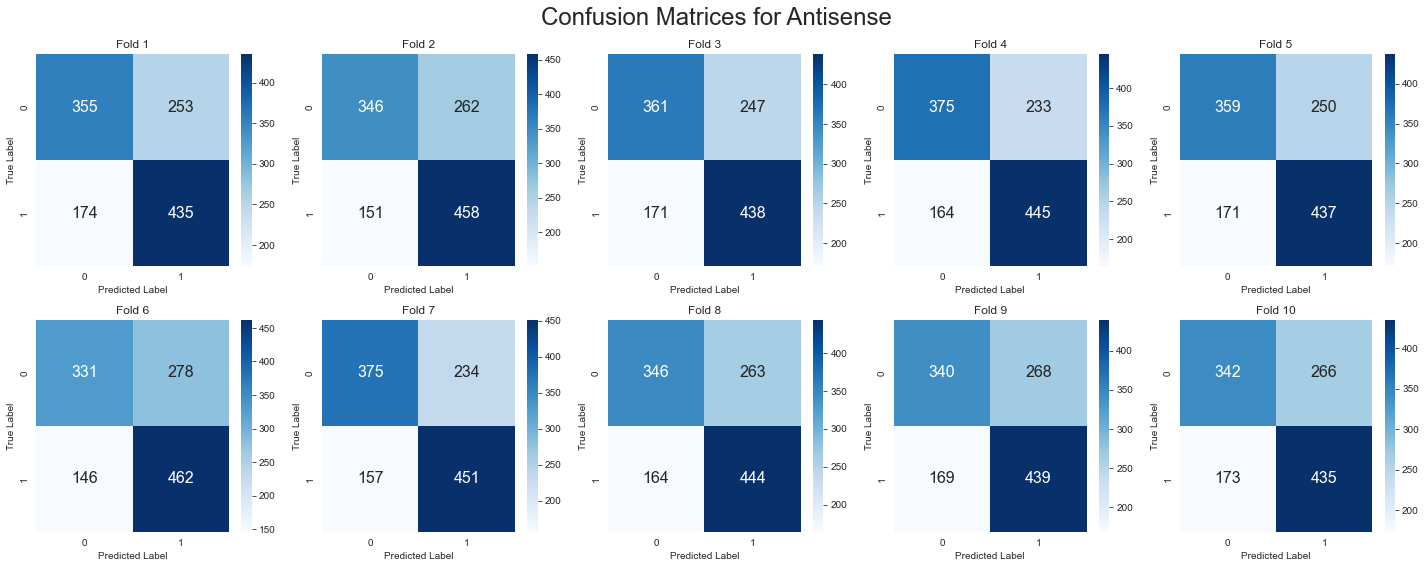

In [69]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

#### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- E.coli
- Helicobactor pylori
- Klebsiella pneumoniae
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Streptomyces coelicolor

In [70]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced perez promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-15.8,-14.7,-19.2,-18.1,-17.0,-18.1,-19.2,-14.9,-14.9,-14.7,...,-17.5,-15.8,-14.7,-17.5,-17.5,-17.5,-16.7,-14.7,-19.5,1
1,-16.7,-14.7,-19.5,-17.5,-17.5,-16.7,-17.5,-17.5,-17.0,-18.1,...,-19.5,-15.8,-14.7,-15.8,-17.5,-17.0,-16.7,-19.5,-14.7,1
2,-14.9,-14.9,-14.7,-14.9,-19.5,-16.7,-19.5,-14.7,-19.5,-15.8,...,-15.8,-14.7,-19.5,-17.5,-16.7,-17.5,-19.5,-14.7,-15.8,1
3,-18.1,-19.5,-17.5,-18.1,-15.8,-19.5,-14.7,-16.7,-17.5,-17.0,...,-17.5,-17.5,-18.1,-19.2,-14.7,-17.5,-17.5,-16.7,-14.7,1
4,-15.8,-14.7,-15.8,-17.5,-17.5,-17.0,-17.5,-17.5,-16.7,-14.7,...,-18.1,-19.5,-17.5,-15.8,-14.7,-17.5,-17.5,-17.5,-16.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-14.9,-14.7,-14.9,-14.9,-19.5,-18.1,-19.2,-14.9,-14.7,-19.2,...,-19.5,-17.5,-18.1,-15.8,-14.7,-14.9,-14.9,-19.2,-14.9,0
12126,-14.9,-19.2,-14.7,-18.1,-19.2,-14.7,-19.5,-17.5,-15.8,-14.7,...,-14.9,-14.7,-19.2,-14.7,-17.5,-18.1,-14.9,-19.2,-14.7,0
12127,-17.5,-15.8,-14.7,-17.5,-15.8,-14.7,-18.1,-14.9,-19.2,-14.7,...,-19.5,-18.1,-19.2,-14.7,-14.9,-19.5,-18.1,-14.9,-19.5,0
12128,-14.7,-14.9,-19.2,-14.7,-17.5,-15.8,-14.7,-18.1,-14.9,-19.5,...,-14.7,-19.2,-14.9,-14.7,-16.7,-14.7,-19.2,-14.9,-14.7,0


In [71]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [72]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.6817807089859852, Precision: 0.6751188589540412, Recall: 0.7018121911037891, F1 Score: 0.6882067851373183, MCC: 0.36382520785363853, Specificity: 0.5625
Fold 2/10
 Accuracy: 0.6718878812860676, Precision: 0.665086887835703, Recall: 0.6935749588138386, F1 Score: 0.6790322580645161, MCC: 0.3440684470485512, Specificity: 0.6617161716171617
Fold 3/10
 Accuracy: 0.6537510305028854, Precision: 0.6555740432612313, Recall: 0.6490939044481054, F1 Score: 0.652317880794702, MCC: 0.3075222865479037, Specificity: 0.6501650165016502
Fold 4/10
 Accuracy: 0.6801319043693322, Precision: 0.6718995290423861, Recall: 0.7051070840197694, F1 Score: 0.6881028938906752, MCC: 0.36067882894517134, Specificity: 0.6584158415841584
Fold 5/10
 Accuracy: 0.6611706512778236, Precision: 0.6550632911392406, Recall: 0.6820428336079077, F1 Score: 0.6682808716707022, MCC: 0.3225920062384867, Specificity: 0.6551155115511551
Fold 6/10
 Accuracy: 0.6611706512778236, Precision: 0.6530612244897959, Recal

In [73]:
internal_accuracy

[0.6817807089859852,
 0.6718878812860676,
 0.6537510305028854,
 0.6801319043693322,
 0.6611706512778236,
 0.6611706512778236,
 0.6413849958779885,
 0.6257213520197856,
 0.6562242374278648,
 0.6727122835943941]

In [74]:
internal_precision

[0.6751188589540412,
 0.665086887835703,
 0.6555740432612313,
 0.6718995290423861,
 0.6550632911392406,
 0.6530612244897959,
 0.6381260096930533,
 0.6180124223602484,
 0.6551724137931034,
 0.6738768718801996]

In [75]:
internal_recall

[0.7018121911037891,
 0.6935749588138386,
 0.6490939044481054,
 0.7051070840197694,
 0.6820428336079077,
 0.6864686468646864,
 0.6518151815181518,
 0.6567656765676567,
 0.6584158415841584,
 0.6683168316831684]

In [76]:
internal_specificity

[0.5625,
 0.6617161716171617,
 0.6501650165016502,
 0.6584158415841584,
 0.6551155115511551,
 0.6402640264026402,
 0.6359143327841845,
 0.6309719934102141,
 0.5947281713344317,
 0.6540362438220758]

In [77]:
internal_f1_score

[0.6882067851373183,
 0.6790322580645161,
 0.652317880794702,
 0.6881028938906752,
 0.6682808716707022,
 0.6693483507642799,
 0.6448979591836734,
 0.6368,
 0.6567901234567902,
 0.6710853355426677]

In [78]:
internal_mcc

[0.36382520785363853,
 0.3440684470485512,
 0.3075222865479037,
 0.36067882894517134,
 0.3225920062384867,
 0.32279128794605555,
 0.2828471583395904,
 0.2519758717913689,
 0.31245463369523746,
 0.34543141233691466]

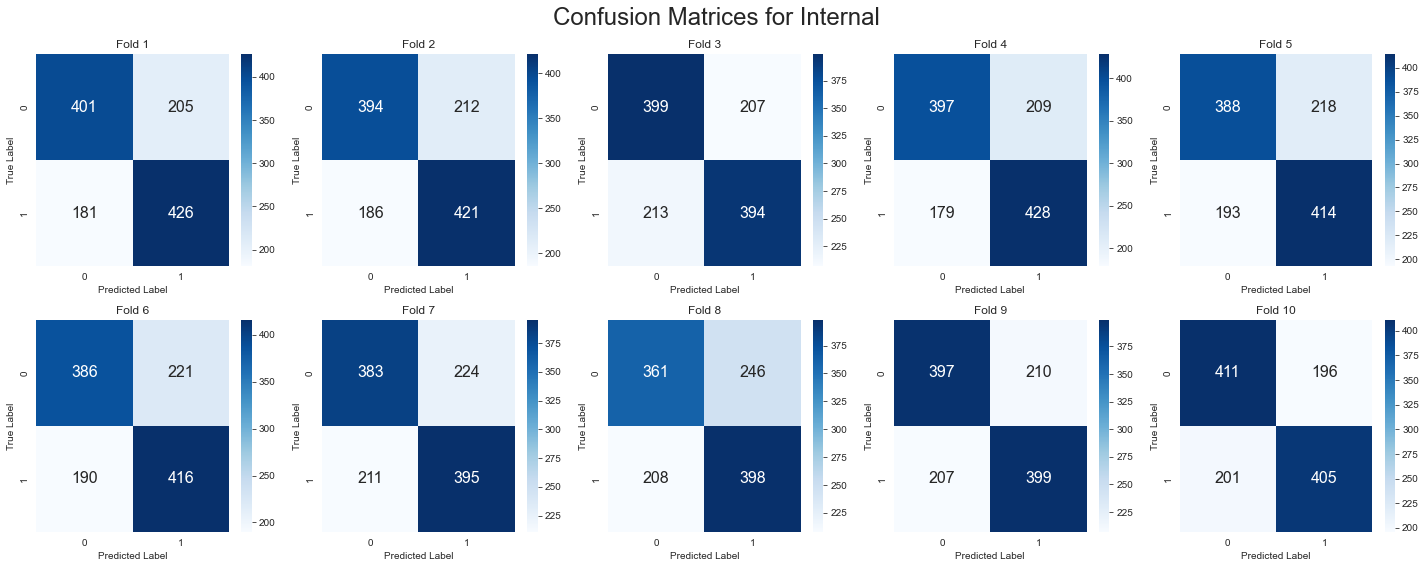

In [79]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
